Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
from glob import glob
import re

***
## Dataset 1

Importing dataset 1 and storing it as dataframe df1

In [2]:
df1 = pd.read_csv('data/data1.txt', index_col='yrmo', parse_dates=True).sort_index()
df1.index.name = 'Date'
#df1 = df1.loc[:'2016',:]
df1.shape

(42074, 7)

In [3]:
df1.columns = [i.lower() for i in df1.columns]
df1.head()

,physicianid,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,,
2015-01-01,6vFQfkVIyHglLHjv,NaN,NaN,4.0,2439.0,2.0,2.0
2015-01-01,KtIQV9FihhozcS4O,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,nh9P8B7ik2qYlruB,6.0,791.0,9.0,5760.0,3.0,174.0
2015-01-01,1fZbRx3Qm2h2rmPP,NaN,NaN,1.0,97.0,NaN,NaN
2015-01-01,UY8bW4koFtgJI8J7,10.0,16299.0,NaN,NaN,NaN,NaN


Exploratory analysis of df1

In [4]:
df1.info() # Counts for non-null values within medication groups matched except for antobiopayments & antibiopatients  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42074 entries, 2015-01-01 to 2017-10-01
Data columns (total 7 columns):
physicianid         42074 non-null object
adderallpatients    23889 non-null float64
adderallpayments    23889 non-null float64
antibiopatients     39829 non-null float64
antibiopayments     39826 non-null float64
opioidpatients      12588 non-null float64
opioidpayments      12588 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


In [5]:
df1.describe() # opioidpatients had a minimum value of 0 unlike adderallpatients and antibiopatients which had 1.

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
count,23889.000000,2.388900e+04,39829.000000,3.982600e+04,12588.000000,1.258800e+04
mean,4.921972,1.828657e+03,6.378217,2.166809e+04,3.095249,2.980236e+03
std,9.248193,2.293074e+04,12.741038,8.379535e+04,6.943019,6.421729e+04
min,1.000000,-1.177100e+04,1.000000,-9.400000e+03,0.000000,-1.000000e+01
25%,1.000000,4.600000e+01,2.000000,3.030000e+02,1.000000,1.500000e+01
50%,3.000000,2.450000e+02,3.000000,2.907000e+03,2.000000,1.220000e+02
75%,5.000000,8.580000e+02,6.000000,1.430375e+04,3.000000,4.410000e+02
max,341.000000,1.732264e+06,285.000000,2.423404e+06,318.000000,2.823021e+06


In [6]:
# Imputing the missing AntibioPayments values

df1['antibiopayments'][df1['antibiopayments'].isnull() & df1['antibiopatients'].notnull()] = 0
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42074 entries, 2015-01-01 to 2017-10-01
Data columns (total 7 columns):
physicianid         42074 non-null object
adderallpatients    23889 non-null float64
adderallpayments    23889 non-null float64
antibiopatients     39829 non-null float64
antibiopayments     39829 non-null float64
opioidpatients      12588 non-null float64
opioidpayments      12588 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Investigating the minimum value for 'opioidpatients'
df1[df1['opioidpatients']==0].loc[:,['physicianid', 'opioidpatients','opioidpayments']]

,physicianid,opioidpatients,opioidpayments
Date,,,
2015-02-01,wwyJwO6CL1dqIooh,0.0,63451.0


In [8]:
df1.corr() # inspecting correlations between different columns

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
adderallpatients,1.000000,0.473078,-0.008713,0.002320,0.405060,0.457266
adderallpayments,0.473078,1.000000,-0.000638,0.012189,0.547049,0.753424
antibiopatients,-0.008713,-0.000638,1.000000,0.714836,0.000226,-0.004713
antibiopayments,0.002320,0.012189,0.714836,1.000000,0.008236,0.012552
opioidpatients,0.405060,0.547049,0.000226,0.008236,1.000000,0.651216
opioidpayments,0.457266,0.753424,-0.004713,0.012552,0.651216,1.000000


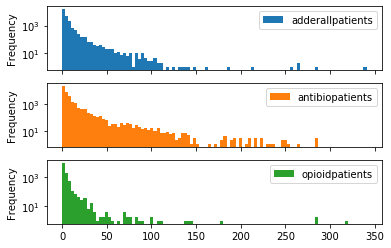

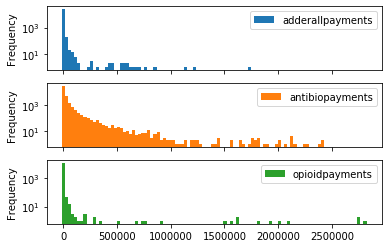

In [9]:
df1.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(kind='hist',subplots=True,bins=100,log=True)
df1.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(kind='hist',subplots=True,bins=100,log=True)
plt.show()

Creating three new dataframes, for Adderall, Opioid and Antibiotic prescribers, respectively. Dropping null values and summarizing each new dataframe by month

In [10]:
#df1_Adderall = df1.loc[:,['PhysicianID','AdderallPatients','AdderallPayments']].dropna()
#df1_Adderall_agg = df1_Adderall.groupby('Date')['AdderallPatients','AdderallPayments'].sum()
#df1_Adderall_agg

#df1_Adderall = df1.loc[:,['PhysicianID','AdderallPatients','AdderallPayments']].dropna()
df1_adderall = df1.groupby('Date')['adderallpatients','adderallpayments'].sum()
df1_antibio = df1.groupby('Date')['antibiopatients','antibiopayments'].sum()
df1_opioid = df1.groupby('Date')['opioidpatients','opioidpayments'].sum()
df1_adderall.tail(10)

,adderallpatients,adderallpayments
Date,,
2017-01-01,2834.0,1790893.0
2017-02-01,2499.0,2247098.0
2017-03-01,2430.0,801030.0
2017-04-01,1873.0,835075.0
2017-05-01,2103.0,480972.0
2017-06-01,2124.0,517995.0
2017-07-01,1656.0,468758.0
2017-08-01,1581.0,445137.0
2017-09-01,1257.0,350291.0


Entries for '2017-10' seem incomplete and may need to be supressed in subsequent analysis 

***
## Dataset 2

Importing datasets, concatenating and storing as dataframe df2

In [11]:
filenames = glob('data/PartD*.txt')
years = [2014, 2015, 2016, 2017]
dataframes = []
chunk = 10**4
for year,filename in zip(years,filenames):
    reader = pd.read_csv(filename, sep='\t', chunksize = chunk)
    for chunk_df in reader:
        chunk_df['year'] = year
        chunk_df['id'] = chunk_df[['npi','year']].apply(lambda x: '_'.join(str(value) for value in x), axis=1)
        chunk_df = chunk_df.drop(['npi','year'], axis=1)
        dataframes.append(chunk_df)

df2 = pd.concat(dataframes, sort=False)

In [12]:
df2 = df2.set_index('id')

In [13]:
df2.index.nunique() == len(df2) # Confirming that each row has a unique id

True

In [14]:
df2.head()

,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
id,,,,,,,,,,,,,,,,,,,,,
1003000126_2014,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,21502.0,...,104.0,227.0,NaN,NaN,NaN,0.0,NaN,144.0,94.0,2.0266
1003000142_2014,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,...,65.0,95.0,NaN,0.0,NaN,0.0,NaN,64.0,82.0,1.6538
1003000159_2014,VOGES,MARSHA,S,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003000167_2014,ESCOBAR,JULIO,E,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,89403.0,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.3362
1003000282_2014,BLAKEMORE,ROSIE,K,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,37243.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4469679 entries, 1003000126_2014 to 1992999882_2017
Data columns (total 83 columns):
nppes_provider_last_org_name        object
nppes_provider_first_name           object
nppes_provider_mi                   object
nppes_credentials                   object
nppes_provider_gender               object
nppes_entity_code                   object
nppes_provider_street1              object
nppes_provider_street2              object
nppes_provider_city                 object
nppes_provider_zip5                 float64
nppes_provider_zip4                 float64
nppes_provider_state                object
nppes_provider_country              object
specialty_description               object
description_flag                    object
medicare_prvdr_enroll_status        object
total_claim_count                   int64
total_30_day_fill_count             float64
total_drug_cost                     float64
total_day_supply                    int64
bene_cou

In [16]:
# Initial exploratory statistical analysis to investigate outliers
df2.describe()

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
count,4.469445e+06,3.950273e+06,4.469679e+06,4.469679e+06,4.469679e+06,4.469679e+06,3.935246e+06,3.499596e+06,3.499596e+06,3.499596e+06,...,3.101946e+06,2.080544e+06,1.477303e+06,1.984060e+06,1.541327e+06,3.227753e+06,1.452348e+06,2.589176e+06,2.589176e+06,3.935246e+06
mean,4.806602e+04,3.781267e+03,1.305766e+03,1.942933e+03,1.251362e+05,5.389819e+04,1.540157e+02,1.268990e+03,1.986144e+03,1.077771e+05,...,7.681676e+01,1.720787e+02,2.911609e+01,4.642288e+00,2.622565e+01,2.370782e-01,1.282276e+00,1.451119e+02,6.510854e+01,1.476258e+00
std,3.031069e+04,2.251558e+03,3.139943e+03,4.547981e+03,3.380184e+05,1.276015e+05,1.985465e+02,2.857082e+03,4.317755e+03,2.542062e+05,...,9.291940e+01,1.923222e+02,6.021685e+01,3.554039e+01,8.383361e+01,4.114569e+00,6.399938e+00,1.745935e+02,8.462852e+01,6.804732e-01
min,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.989000e-01
25%,2.120100e+04,2.048000e+03,5.300000e+01,6.200000e+01,1.582115e+03,9.550000e+02,3.300000e+01,6.800000e+01,8.000000e+01,2.186157e+03,...,2.300000e+01,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.700000e+01,2.000000e+01,1.068100e+00
50%,4.504000e+04,3.339000e+03,1.980000e+02,2.323000e+02,9.928970e+03,4.514000e+03,8.400000e+01,2.350000e+02,2.878000e+02,1.341678e+04,...,4.700000e+01,1.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.700000e+01,4.000000e+01,1.307000e+00
75%,7.670500e+04,5.147000e+03,9.930000e+02,1.353600e+03,9.640037e+04,3.645700e+04,2.050000e+02,1.074000e+03,1.573200e+03,1.001162e+05,...,9.700000e+01,2.380000e+02,3.400000e+01,0.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,1.950000e+02,7.900000e+01,1.679100e+00
max,9.992900e+04,9.999000e+03,4.472880e+05,4.479605e+05,2.645885e+07,5.634058e+06,3.996500e+04,3.791620e+05,3.797510e+05,1.342742e+07,...,1.655700e+04,2.531600e+04,3.592000e+03,4.309000e+03,1.135300e+04,4.020000e+02,9.950000e+02,2.813900e+04,1.182600e+04,1.164220e+01


Initial removal of unnecessary character columns (example street address, names, middle initials and flags) based on instructions and recommendations from the data source documentation https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf

This process will be repeated when columns are further analyzed for redundancy and relevancy to the response variable

In [17]:
# Removing unnecessary columns from the dataframe
pattern1 = re.compile('suppress')
pattern2 = re.compile('nppes')
to_remove = [i for i in df2.columns if pattern1.findall(i) or pattern2.findall(i)] + ['description_flag']
to_remove = [i for i in to_remove if i not in ('nppes_provider_gender','nppes_provider_zip5','nppes_provider_state')]

to_remove # List of columns to be removed

['nppes_provider_last_org_name',
 'nppes_provider_first_name',
 'nppes_provider_mi',
 'nppes_credentials',
 'nppes_entity_code',
 'nppes_provider_street1',
 'nppes_provider_street2',
 'nppes_provider_city',
 'nppes_provider_zip4',
 'nppes_provider_country',
 'ge65_suppress_flag',
 'bene_count_ge65_suppress_flag',
 'brand_suppress_flag',
 'generic_suppress_flag',
 'other_suppress_flag',
 'mapd_suppress_flag',
 'pdp_suppress_flag',
 'lis_suppress_flag',
 'nonlis_suppress_flag',
 'antipsych_ge65_suppress_flag',
 'antipsych_bene_ge65_suppress_flg',
 'description_flag']

In [18]:
df3 = df2.drop(to_remove,axis=1)

In [19]:
df3.shape # Checking the shape of the reduced dataframe to show number of columns is now 61

(4469679, 61)

In [20]:
# Converting 'nppes_provider_zip5' into a string
df3['nppes_provider_zip5'] = df3['nppes_provider_zip5'].map(lambda x: str(x))

In [21]:
df3.isnull().sum() # Checking for number of null values within columns

nppes_provider_gender                    63
nppes_provider_zip5                       0
nppes_provider_state                      0
specialty_description                     0
medicare_prvdr_enroll_status              0
total_claim_count                         0
total_30_day_fill_count                   0
total_drug_cost                           0
total_day_supply                          0
bene_count                           534433
total_claim_count_ge65               970083
total_30_day_fill_count_ge65         970083
total_drug_cost_ge65                 970083
total_day_supply_ge65                970083
bene_count_ge65                     1974093
brand_claim_count                   1890317
brand_drug_cost                     1890317
generic_claim_count                 1213086
generic_drug_cost                   1213086
other_claim_count                   1057739
other_drug_cost                     1057739
mapd_claim_count                     916342
mapd_drug_cost                  

The 'nppes_provider_zip5' missing values are associated with non-US claims. The zip code will be imputed with the integer '99999' and the non-US countries will be replaced with 'non-US'. 

Likewise, the 'nppes_provider_gender' column has 63 null values, which are associated with npis that are not actual physicians but institutions. Hence, the missing gender entries will be replaced with the string 'X'.

In [22]:
# Imputing the string 'X' for missing 'nppes_provider_gender' entries
df3['nppes_provider_gender'].fillna('X', inplace=True)

# Imputing the integer '99999' for missing 'nppes_provider_zip5' entries and converting values to string    
df3['nppes_provider_zip5'].fillna(99999, inplace=True)
df3['nppes_provider_zip5'] = df3['nppes_provider_zip5'].map(lambda x: str(x))

Except for 'opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries' and 'beneficiary_average_risk_score', the missing values in the numerical columns were clearly missing at random and occur when the Medicare PartD total claim or total beneficiary count was less than 11 as well as when a subcategory member count was less than 11. Hence, in situations where the total_count or bene_count was less than 11 the missing values will be imputed imputed with the integer '5'.

Subsequently, the subcategory counts and costs aggregrates are fractions of the initial totals. For example brand_claim_count is a subcategory of total_claim_count and represents the proportion of total_claim_counts associated with brand prescriptions. Similarly, generic_drug_cost is a subcategory of total_drug_cost and represents the proportion of total_drug_costs associated with generic prescriptions.

With this in mind, the average proportions of each subcategory relative to its corresponding total was calculated and this value was used in the imputation of missing subcategory values. A dataframe of about 150,000 rows with the least number of missing values were selected and used to calculate the subcategory proportions.

In [23]:
# Imputing the integer '5' for missing entries in 'bene_count' 
df3['bene_count'].fillna(5, inplace=True)

In [24]:
# Creating a subset dataframe (df_sub) of rows with non-missing values > 57 out of 61
df_sub = df3[df3.notnull().sum(axis=1) > 57]

In [25]:
# df_sub was exported as a csv file. The average subcategory proportions was calculated using excel 
# and the file was re-imported as a new dataframe, 'multiplier.xlsx' 

# importing the file containing the calculated proportion values into a new dataframe, impute
impute = pd.read_excel('multipliers.xlsx', sheet_name='Sheet1')
impute.columns = ['column_names','ref_total', 'multiplier']
impute['ref_total'] = impute['ref_total'].map(lambda x: x.strip())
impute

# Explanation of how the impute data will be used to impute values:
# Using 'brand_claim_count' (row 5 in the impute dataframe below), the ref_total is 'total_claim_count',
# and the multiplier is 0.208034. This means that on average, brand_claim_count represents about 21% 
# of the total_claim_counts per physician. Hence, missing brand_claim_counts will be imputed as 
# multiplier * total_claim_count for that row.

,column_names,ref_total,multiplier
0,total_claim_count_ge65,total_claim_count,0.826511
1,total_30_day_fill_count_ge65,total_30_day_fill_count,0.849652
2,total_drug_cost_ge65,total_drug_cost,0.772285
3,total_day_supply_ge65,total_day_supply,0.852593
4,bene_count_ge65,bene_count,0.841039
5,brand_claim_count,total_claim_count,0.208034
6,brand_drug_cost,total_drug_cost,0.743894
7,generic_claim_count,total_claim_count,0.783205
8,generic_drug_cost,total_drug_cost,0.251573
9,other_claim_count,total_claim_count,0.008761


In [26]:
df4 = df3.copy() # Creating a copy of the df before imputation of subcategory columns

In [27]:
# Imputation of missing subcategory numerical columns based on calculated multipliers

for column_name, total_count, multiplier in zip(impute['column_names'], impute['ref_total'], impute['multiplier']):
    col_list = [(j * multiplier) if str(i) == 'nan' else i for i,j in zip(df4[column_name],df4[total_count])]
    df4[column_name] = col_list

In [28]:
# Randomly selecting columns to inspect imputation method for accuracy by comparing df2 and df2_clean dataframes
sub_cat = 'brand_claim_count'
total = 'total_claim_count'

print('{:<25} {:<30} {}'.format('df3_' + sub_cat, 'df4_' + sub_cat, total))
for i,j,k in zip(df3[sub_cat][:20], df4[sub_cat][:20], df3[total][:20]):
    print('{:<25} {:<30} {}'.format(i,j,k))    

df3_brand_claim_count     df4_brand_claim_count          total_claim_count
124.0                     124.0                          675
116.0                     116.0                          937
nan                       3.7446147192917034             18
0.0                       0.0                            58
0.0                       0.0                            14
nan                       87.37434345013975              420
nan                       24.13196152432431              116
nan                       13.938288121808007             67
967.0                     967.0                          5408
884.0                     884.0                          5503
nan                       16.01862963252562              77
nan                       10.817775855731588             52
nan                       250.4731178904006              1204
nan                       28.084610394687775             135
680.0                     680.0                          3347
153.0       

In [29]:
# Checking the percentage of null values in the non-subcategory numerical columns
df4.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
    'average_age_of_beneficiaries','beneficiary_average_risk_score']].isnull().mean() * 100

opioid_prescriber_rate            28.642616
la_opioid_prescriber_rate         40.837877
average_age_of_beneficiaries      11.956854
beneficiary_average_risk_score    11.956854
dtype: float64

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


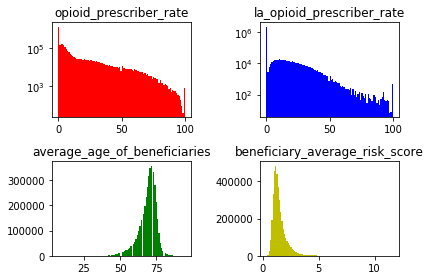

In [30]:
# Checking the frequency distribution of values in the non-subcategory numerical columns
plt.subplot(2,2,1)
plt.hist(df4['opioid_prescriber_rate'], bins=100, log=True, color='r')
plt.title('opioid_prescriber_rate')

plt.subplot(2,2,2)
plt.hist(df4['la_opioid_prescriber_rate'], bins=100, log=True, color='b')
plt.title('la_opioid_prescriber_rate')

plt.subplot(2,2,3)
plt.hist(df4['average_age_of_beneficiaries'], bins=100, color='g')
plt.title('average_age_of_beneficiaries')

plt.subplot(2,2,4)
plt.hist(df4['beneficiary_average_risk_score'], bins=100, color='y')
plt.title('beneficiary_average_risk_score')

plt.tight_layout()
plt.show()

In [31]:
# Identifying columns in the dataset with the highest correlations to the non-subcategory numerical columns
df4_corr = df4.corr()
df4_corr = df4_corr.apply(lambda x: abs(x))

collection = {}
for col in df4_corr.index:
    collection[col] = (max([i for i in df4_corr[col] if i!= 1]), df4_corr[col].drop(df4_corr[col].idxmax()).idxmax())

high_corr = pd.DataFrame([collection]).T
high_corr['r'] = [i[0] for i in high_corr[0]]
high_corr['col_r'] = [i[1] for i in high_corr[0]]
del high_corr[0]
high_corr.drop_duplicates('r', inplace=True)
high_corr.sort_values('r', ascending=False, inplace=True)
high_corr.loc[['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
              'average_age_of_beneficiaries', 'beneficiary_average_risk_score']]

,r,col_r
opioid_prescriber_rate,0.362355,opioid_bene_count
la_opioid_prescriber_rate,0.420322,la_opioid_claim_count
average_age_of_beneficiaries,0.291846,beneficiary_age_greater_84_count
beneficiary_average_risk_score,0.104275,lis_drug_cost


The columns, 'opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries' and 'beneficiary_average_risk_score' were not very correlated to any of the other columns in the dataset. Hence, regression will not be used for used for imputation. Column means will be used instead. However, with over 35% null values in 'la_opioid_prescriber_rate', 10% of the total rows in the dataframe will be deleted. The delected rows will consist of randomly selected rows with null 'la_opioid_prescriber_rate' values. 

In [32]:
# Deletion of a fraction of rows with null 'la_opioid_prescriber_rate' values and saving the reduced dataframe as df5
n = int(len(df4)*0.1)
df_del = df4[df4['la_opioid_prescriber_rate'].isnull()].sample(n=n)
df5 = df4.loc[~df4.index.isin(df_del.index)]
df5.shape

(4022712, 61)

In [33]:
# Checking the percentage of null values in the non-subcategory numerical columns of the reduced dataframe, df5
df5.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
    'average_age_of_beneficiaries','beneficiary_average_risk_score']].isnull().mean() * 100

opioid_prescriber_rate            31.109262
la_opioid_prescriber_rate         34.264322
average_age_of_beneficiaries      10.941449
beneficiary_average_risk_score    10.941449
dtype: float64

Comparing descriptive statistics of df4 and df5 to make sure there are no major differences due to row deletion

In [34]:
df4.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
              'average_age_of_beneficiaries', 'beneficiary_average_risk_score']].describe()

,opioid_prescriber_rate,la_opioid_prescriber_rate,average_age_of_beneficiaries,beneficiary_average_risk_score
count,3.189446e+06,2.644357e+06,3.935246e+06,3.935246e+06
mean,1.111902e+01,3.449097e+00,6.916635e+01,1.476258e+00
std,1.742129e+01,9.261543e+00,6.142722e+00,6.804732e-01
min,0.000000e+00,0.000000e+00,7.000000e+00,2.989000e-01
25%,0.000000e+00,0.000000e+00,6.600000e+01,1.068100e+00
50%,3.100000e+00,0.000000e+00,7.000000e+01,1.307000e+00
75%,1.447000e+01,0.000000e+00,7.300000e+01,1.679100e+00
max,1.000000e+02,1.000000e+02,9.500000e+01,1.164220e+01


In [35]:
df5.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
              'average_age_of_beneficiaries', 'beneficiary_average_risk_score']].describe()

,opioid_prescriber_rate,la_opioid_prescriber_rate,average_age_of_beneficiaries,beneficiary_average_risk_score
count,2.771276e+06,2.644357e+06,3.582569e+06,3.582569e+06
mean,1.214182e+01,3.449097e+00,6.917760e+01,1.472458e+00
std,1.789210e+01,9.261543e+00,6.066695e+00,6.777369e-01
min,0.000000e+00,0.000000e+00,7.000000e+00,2.989000e-01
25%,0.000000e+00,0.000000e+00,6.600000e+01,1.067200e+00
50%,3.920000e+00,0.000000e+00,7.000000e+01,1.304500e+00
75%,1.725000e+01,0.000000e+00,7.300000e+01,1.672200e+00
max,1.000000e+02,1.000000e+02,9.500000e+01,1.164220e+01


In [36]:
# Using column means to impute null entries in 'opioid_prescriber_rate','la_opioid_prescriber_rate',
# 'average_age_of_beneficiaries' and 'beneficiary_average_risk_score'
df5['opioid_prescriber_rate'].fillna(df5['opioid_prescriber_rate'].mean(), inplace=True)
df5['la_opioid_prescriber_rate'].fillna(df5['la_opioid_prescriber_rate'].mean(), inplace=True)
df5['average_age_of_beneficiaries'].fillna(df5['average_age_of_beneficiaries'].mean(), inplace=True)
df5['beneficiary_average_risk_score'].fillna(df5['beneficiary_average_risk_score'].mean(), inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
df5.isnull().sum().sum() == 0 # Confirming that all columns no longer have null values

True

Adding two new columns, 'npi_type_pref' and 'npi_drug_pref', to capture the most prescribed drug type (brand or generic) or drug indication (opioid, antibiotic, antipsych) per physician per year 

In [38]:
npi_type_pref, npi_drug_pref = [],[]
    
for i,j,k,l,m,n,o in zip(df5['total_claim_count'],df5['brand_claim_count'],
                         df5['generic_claim_count'],df5['opioid_claim_count'],
                         df5['la_opioid_claim_count'],df5['antibiotic_claim_count'],
                         df5['antipsych_claim_count_ge65']):
    a = [j/i, k/i]
    b = [l/i, m/i, n/i, o/i]
            
    if a[0] == a[1]:
        npi_type_pref.append('no_pref')
    elif a[0] > a[1]:
        npi_type_pref.append('brand')
    else:
        npi_type_pref.append('generic')
            
    maxb = [index for index,value in enumerate(b) if max(b) == value] 
    if len(maxb) > 1:
        npi_drug_pref.append('no_pref')
    else:
        if maxb[0] == 0:
            npi_drug_pref.append('opioid')
        elif maxb[0] == 1:
            npi_drug_pref.append('la_opioid')
        elif maxb[0] == 2:
            npi_drug_pref.append('antibiotic')
        elif maxb[0] == 3:
            npi_drug_pref.append('antipsych')        
            
df5['npi_type_pref'], df5['npi_drug_pref']  = npi_type_pref, npi_drug_pref 
df5.shape                               

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(4022712, 63)

In [39]:
# Inspecting newly created columns
df5['npi_type_pref'].value_counts(dropna=False)

generic    3873788
brand       145318
no_pref       3606
Name: npi_type_pref, dtype: int64

In [40]:
df5['npi_drug_pref'].value_counts(dropna=False)

antibiotic    1930717
opioid        1714819
no_pref        244510
antipsych      132023
la_opioid         643
Name: npi_drug_pref, dtype: int64